# Logistic Regression in scikit-learn - Lab

## Introduction 

In this lab, you are going to fit a logistic regression model to a dataset concerning heart disease. Whether or not a patient has heart disease is indicated in the column labeled `'target'`. 1 is for positive for heart disease while 0 indicates no heart disease.

## Objectives

In this lab you will: 

- Fit a logistic regression model using scikit-learn 


## Let's get started!

Run the following cells that import the necessary functions and import the dataset: 

In [1]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
# Import data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Getting the general information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Define appropriate `X` and `y` 

Recall the dataset contains information about whether or not a patient has heart disease and is indicated in the column labeled `'target'`. With that, define appropriate `X` (predictors) and `y` (target) in order to model whether or not a patient has heart disease.

In [4]:
# Split the data into target and predictors
y = df["target"]
X = df.drop("target", axis = 1)

## Normalize the data 

Normalize the data (`X`) prior to fitting the model. 

In [5]:
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

X = X.apply(normalize)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.950624,0.679881,1.969864,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324
1,-1.912150,0.679881,1.000921,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075
2,-1.471723,-1.465992,0.031978,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075
3,0.179877,0.679881,0.031978,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075
4,0.289984,-1.465992,-0.936965,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075


## Train- test split 

- Split the data into training and test sets 
- Assign 25% to the test set 
- Set the `random_state` to 0 

N.B. To avoid possible data leakage, it is best to split the data first, and then normalize.

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
173,0.400091,0.679881,1.000921,0.021453,-0.429552,-0.416945,-1.004171,1.019558,-0.69548,1.860686,0.974740,1.242538,1.121174
261,-0.260549,0.679881,-0.936965,-1.118919,-0.313791,-0.416945,0.897478,0.452000,-0.69548,-0.895381,0.974740,0.264644,-0.512075
37,-0.040336,0.679881,1.000921,1.047787,-0.275204,-0.416945,-1.004171,0.670292,-0.69548,0.482653,0.974740,-0.713249,1.121174
101,0.510197,0.679881,1.969864,2.644307,0.457952,-0.416945,-1.004171,-0.202874,-0.69548,2.721957,-2.270822,-0.713249,1.121174
166,1.391051,0.679881,-0.936965,-0.662770,-0.333085,-0.416945,-1.004171,-0.901407,1.43311,1.343924,-0.648041,1.242538,1.121174


## Fit a model

- Instantiate `LogisticRegression`
  - Make sure you don't include the intercept  
  - set `C` to a very large number such as `1e12` 
  - Use the `'liblinear'` solver 
- Fit the model to the training data 

In [8]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

## Predict
Generate predictions for the training and test sets. 

In [9]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

## How many times was the classifier correct on the training set?

In [10]:
# Your code here
results = 0
for idx, y in enumerate(y_hat_train):
    if y_hat_train[idx] == list(y_train)[idx]:
        results += 1
        
print(f"The classifier was correct {results} times on the training set out of {len(y_train)}")

The classifier was correct 192 times on the training set out of 227


## How many times was the classifier correct on the test set?

In [11]:
# Your code here

results_test = 0
for idx, y in enumerate(y_hat_test):
    if y_hat_test[idx] == list(y_test)[idx]:
        results_test += 1
        
print(f"The classifier was correct {results_test} times on the test set out of {len(y_test)}")

The classifier was correct 63 times on the test set out of 76


This can further be confirmed using a confusion matrix on the model.

In [12]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[24  9]
 [ 4 39]]


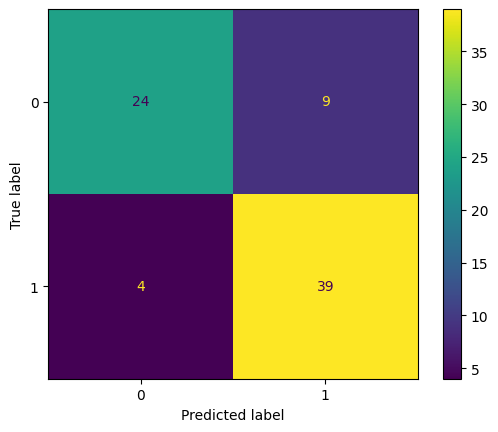

In [13]:
# Import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize the confusion matrix
#plot_confusion_matrix()
disp = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels= logreg.classes_)
disp.plot()

In [14]:
accuracy = results_test * 100/ len(y_test)
accuracy

82.89473684210526

In [15]:
results*100/len(y_train)

84.58149779735683

## Analysis
Describe how well you think this initial model is performing based on the training and test performance. Within your description, make note of how you evaluated performance as compared to your previous work with regression.

##### Your analysis here
The model is 82.89% accurate on the test based on the simple calculations above, and 84.58% accurate on the training dataset.

In this case I have used the confusion matrix to evaluate the performance of the model as opposed to linear regression where we used the mean squared arror and the root mean squared error ro avaluate the performance of the models.

I have further went ahead and visualized the confusion matrix for easy interpretation.

## Summary

In this lab, you practiced a standard data science pipeline: importing data, split it into training and test sets, and fit a logistic regression model. In the upcoming labs and lessons, you'll continue to investigate how to analyze and tune these models for various scenarios.